# [Lab Session 2](otsu.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [2]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [3]:
img8 = (imgf * 255).round().astype(np.uint8)


**[Task 1.3.]()** Compute the image histogram:

In [4]:
h = []
for i in range (0,256):
    counts = np.sum(img8 == i)
    h.append(counts)


Show the computed histogram:

<BarContainer object of 256 artists>

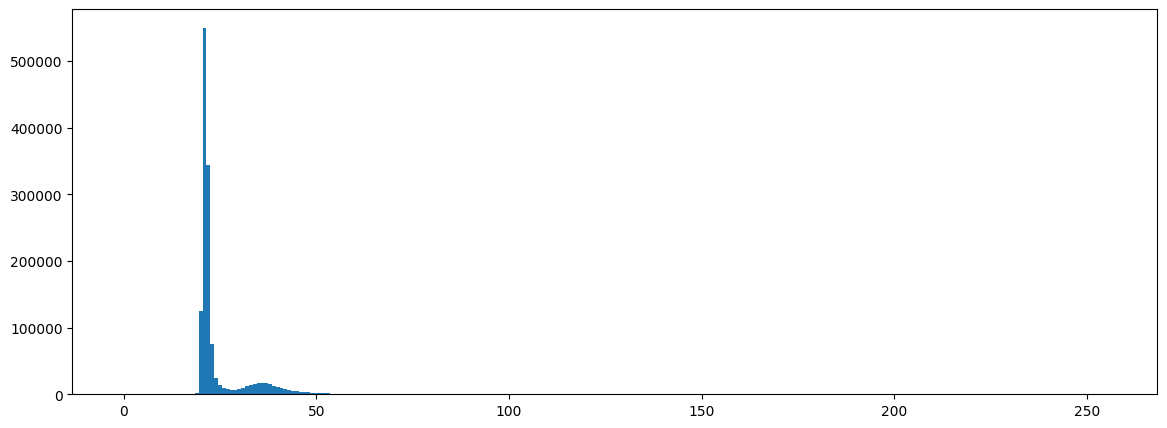

In [5]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

1. Bildung von 2 klassen, die zufällig mit Threshhold T getrennt werden

2. berechnen wieviel pixel jeweils in den klassen sind 

3. mittelwert der Intensitäten berechnen ?

4. Varianz der klassen bestimmen

5. kleinsten "kostenwert" finden

In [6]:

optimal_T = 0
min_cost = np.inf  # damit jeder erste  threshhold. wert kleiner ist aks np.inf

# durch gehen aller threshholds 
for T in range(1, 256):

    #class 1
    class1_pixels = img8[img8 < T]
    n1 = len(class1_pixels)

    #class 2
    class2_pixels = img8[img8 >= T]
    n2 = len(class2_pixels)

    # verhindern dass eine klasse leer und somit alle werte in der anderen sind 
    if n1 == 0 or n2 == 0:
        continue

    #means
    mu1 = np.mean(class1_pixels)
    mu2 = np.mean(class2_pixels)

    #varianzen
    var1 = np.var(class1_pixels)
    var2 = np.var(class2_pixels)

    # otsu formel (1) aus assigments
    cost_T = n1 * var1 + n2 * var2

    # --- Minimalen Wert finden ---
    if cost_T < min_cost:
        min_cost = cost_T
        optimal_T = T

print("Optimaler Threshold T:", optimal_T)

Optimaler Threshold T: 31


**[Task 1.5.]()** Perform Otsu thresholding:

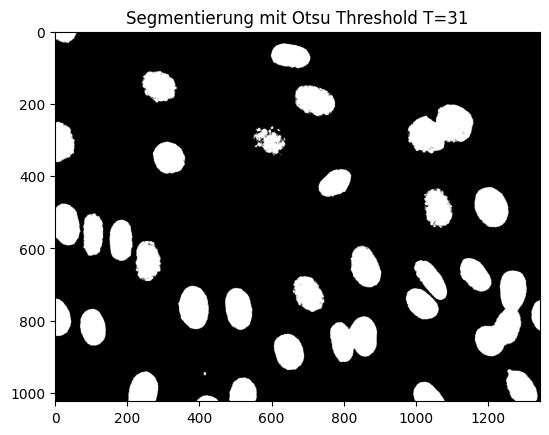

In [7]:
binary_img = (img8 >= optimal_T).astype(np.uint8) * 255

plt.imshow(binary_img, cmap='gray')
plt.title("Segmentierung mit Otsu Threshold T=" + str(optimal_T))
plt.show()  

**[Task 1.6.]()** Compute the Dice coefficient:

In [8]:
bin_bool = binary_img > 0
gt_bool = plt.imread("data/NIH3T3/gt/0.png") > 0

dice = 2 * np.sum(bin_bool & gt_bool) / (np.sum(bin_bool) + np.sum(gt_bool))

print("Dice-Koeffizient:", dice)

Dice-Koeffizient: 0.8943783223933183
